## Provide a summary of the different descriptive statistics you looked at and why.

I focused my analysis in country, gender (sex), age, sports and medals to understand better 
this variables that are important to prove my hypothesis.

### Importing libraries

In [1]:
import pandas as pd
import psycopg2 as ps4

from sqlalchemy import create_engine


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style = 'darkgrid')

%matplotlib inline

In [3]:
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
               "@{host}:{port}/{database}")
print(cnxn_string)

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


In [4]:
engine = create_engine(cnxn_string.format(
    username="postgres", 
    pswd="Sadworld@5", 
    host="localhost", 
    port=5432,
    database="CapStone"))

#### loading data

In [5]:
athlete_events = pd.read_sql_table('athlete_events',engine)
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1573,Norihiro Akahoshi,M,24.0,170.0,65.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,No Medal
1,1574,Kosei Akaishi,M,19.0,172.0,74.0,Japan,JPN,1984 Summer,1984,Summer,Los Angeles,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
2,1574,Kosei Akaishi,M,23.0,172.0,74.0,Japan,JPN,1988 Summer,1988,Summer,Seoul,Wrestling,"Wrestling Men's Lightweight, Freestyle",No Medal
3,1574,Kosei Akaishi,M,27.0,172.0,74.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Lightweight, Freestyle",Bronze
4,1575,Stella Akakpo,F,22.0,166.0,60.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,No Medal


In [6]:
athlete_info = pd.read_sql_table('athlete_events',engine).loc[:,"ID":"Weight"]
athlete_info.head()

,ID,Name,Sex,Age,Height,Weight
0,1573,Norihiro Akahoshi,M,24.0,170.0,65.0
1,1574,Kosei Akaishi,M,19.0,172.0,74.0
2,1574,Kosei Akaishi,M,23.0,172.0,74.0
3,1574,Kosei Akaishi,M,27.0,172.0,74.0
4,1575,Stella Akakpo,F,22.0,166.0,60.0


**I already cleaned the data in Week 1 assignment**

In [7]:
#clean data:
athlete_info.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
dtype: int64

#### Group by gender

In [8]:
gender_grp = athlete_info.groupby('Sex')

In [9]:
age_by_sex = gender_grp['Age'].describe().loc[:,['count','mean','min','max']].sort_values(by = 'Sex', ascending = False)
age_by_sex

,count,mean,min,max
Sex,,,,
M,187544.0,26.277562,10.0,97.0
F,74098.0,23.732881,11.0,74.0


In [10]:
gender_grp['Height'].describe().loc[:,['count','mean','min','max']].sort_values(by = 'Sex', ascending = False)

,count,mean,min,max
Sex,,,,
M,187544.0,177.963694,127.0,226.0
F,74098.0,168.494939,127.0,213.0


In [11]:
gender_grp['Height'].describe().loc[:,['count','mean','min','max']].sort_values(by = 'Sex', ascending = False)

,count,mean,min,max
Sex,,,,
M,187544.0,177.963694,127.0,226.0
F,74098.0,168.494939,127.0,213.0


In [12]:
bin_query ="""

SELECT
  *,
  CASE
    WHEN"Age"BETWEEN 10 and 15
    THEN 'group_A'
    WHEN"Age"between 15 and 20
    THEN 'group_B'
    WHEN"Age"BETWEEN 20 and 25
    THEN 'group_C'
    WHEN"Age"BETWEEN 25 and 30
    THEN 'group_D'
    WHEN"Age"BETWEEN 30 and 35
    THEN 'group_E'
    WHEN"Age"BETWEEN 35 and 40
    THEN 'group_F'
    WHEN"Age"BETWEEN 40 and 50
    THEN 'group_G'
    WHEN"Age"BETWEEN 50 and 60
    THEN 'group_H'
    WHEN"Age"between 60 and 70
    THEN 'group_I'
    when "Age"between 70 and 80
    then 'group_J'
    when "Age"between 80 and 90
    then 'group_K'
    when "Age"between 90 and 100
    then 'group_L'
END as group_age 
from athlete_events 
"""

#### Binning the age:

In [13]:
grouping_age = pd.read_sql_query(bin_query,engine)
grouping_age.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,group_age
0,1573,Norihiro Akahoshi,M,24.0,170.0,65.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,No Medal,group_C
1,1574,Kosei Akaishi,M,19.0,172.0,74.0,Japan,JPN,1984 Summer,1984,Summer,Los Angeles,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,group_B
2,1574,Kosei Akaishi,M,23.0,172.0,74.0,Japan,JPN,1988 Summer,1988,Summer,Seoul,Wrestling,"Wrestling Men's Lightweight, Freestyle",No Medal,group_C
3,1574,Kosei Akaishi,M,27.0,172.0,74.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Lightweight, Freestyle",Bronze,group_D
4,1575,Stella Akakpo,F,22.0,166.0,60.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,No Medal,group_C


In [14]:
df = pd.DataFrame(grouping_age['group_age'].value_counts())
age_group = df.sort_index()

In [15]:
age_group

,group_age
group_A,3280
group_B,44281
group_C,103280
group_D,68694
group_E,25723
group_F,8683
group_G,5763
group_H,1368
group_I,469
group_J,93


In [16]:
Countries_query = """
SELECT 
    nr."region",
    count(distinct ae."ID") as "number of players"
from 
    athlete_events as ae 
left join 
    noc_regions as nr 
on 
    ae."NOC" = nr."NOC"
group by 1
order by 2 desc
limit 10

"""

In [17]:
countries_with_most_players = pd.read_sql_query(Countries_query,engine)
countries_with_most_players

,region,number of players
0,USA,9499
1,Germany,7475
2,UK,5789
3,Russia,5462
4,France,5200
5,Canada,4674
6,Italy,4654
7,Japan,3965
8,Australia,3800
9,Sweden,3784


In [18]:
event_count = """
select 
    "Sport",
    count(distinct "Event") as "Number of Event"
from 
    athlete_events
group by 1
order by 2 desc
"""

In [19]:
sport_by_event = pd.read_sql_query(event_count,engine)
sport_by_event

,Sport,Number of Event
0,Athletics,83
1,Shooting,83
2,Swimming,54
3,Cycling,44
4,Sailing,37
...,...,...
61,Rugby,1
62,Tug-Of-War,1
63,Roque,1
64,Aeronautics,1


In [20]:
medals = """
select 
    ng.region as REGION,
    ae."Medal" as Medal,
    count("ID") as number_of_medals
from
    athlete_events as ae
Left Outer Join 
    noc_regions ng
on ae."NOC" = ng."NOC"
WHERE "Medal" != 'No Medal'
group by 1 ,2
order by 3 desc;
"""

In [21]:
medal_by_country = pd.read_sql_query(medals,engine)
medal_by_country.head()

,region,medal,number_of_medals
0,USA,Gold,2627
1,USA,Silver,1619
2,Russia,Gold,1599
3,USA,Bronze,1346
4,Germany,Gold,1293


In [22]:
players = """
select 
    distinct ae."ID",
    ae."Name",
    ng.region as REGION,
    count(ae."Medal") as number_of_medals
from
    athlete_events as ae
Left Outer Join 
    noc_regions ng
on ae."NOC" = ng."NOC"
WHERE "Medal" != 'No Medal'
group by 1,2,3
having count(ae."Medal") > 1
order by 4 desc; 
"""

In [23]:
athlete_medal = pd.read_sql_query(players,engine)
athlete_medal.head()

,ID,Name,region,number_of_medals
0,94406,"Michael Fred Phelps, II",USA,28
1,67046,Larysa Semenivna Latynina (Diriy-),Russia,18
2,4198,Nikolay Yefimovich Andrianov,Russia,15
3,11951,Ole Einar Bjrndalen,Norway,13
4,74420,Edoardo Mangiarotti,Italy,13


## Submit 2-3 key points you may have discovered about the data, e.g. new relationships? 
## Did you come up with additional ideas for other things to review?


####  Variables gender (sex), height and weight:

Text(0.5, 1.0, 'Olympic women height')

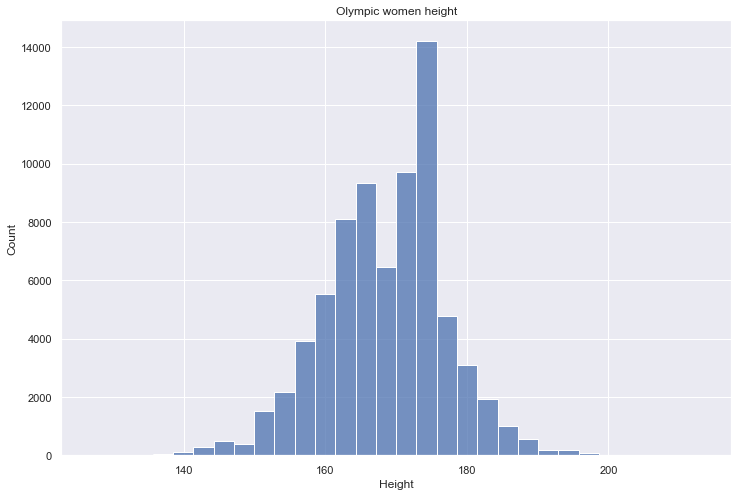

In [31]:
plt.figure(figsize = (12,8))
sns.histplot(data = athlete_info , x = athlete_info['Height'].loc[athlete_info['Sex'] == 'F'],bins = 30)
plt.title('Olympic women height')

Text(0.5, 1.0, "Olympic men's height")

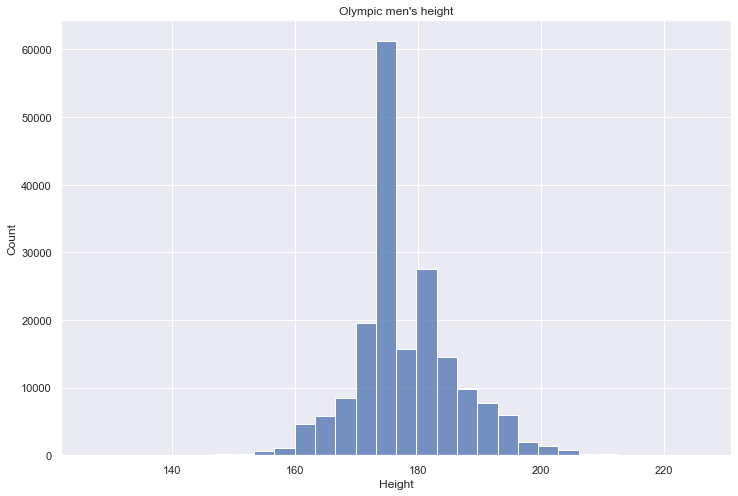

In [44]:
plt.figure(figsize = (12,8))
sns.histplot(data = athlete_info , x = athlete_info['Height'].loc[athlete_info['Sex'] == 'M'],bins = 30)
plt.title('Olympic men\'s height')

Text(0.5, 1.0, 'Olympic women weight')

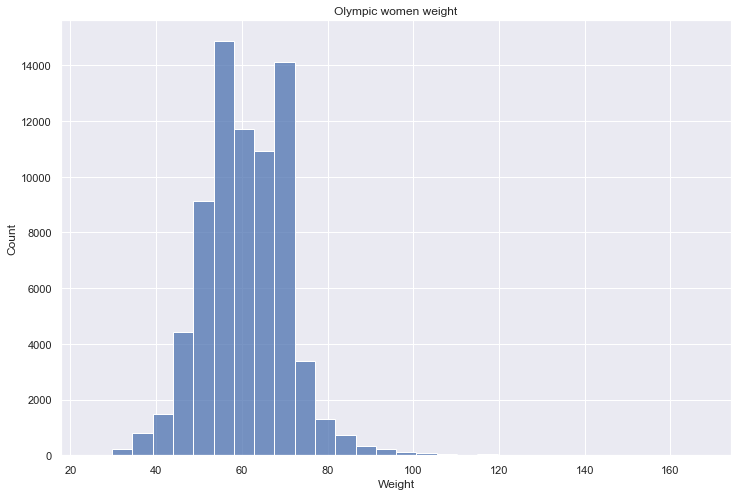

In [26]:
plt.figure(figsize = (12,8))
sns.histplot(data = athlete_info , x = athlete_info['Weight'].loc[athlete_info['Sex'] == 'F'],bins = 30)
plt.title('Olympic women weight')

Text(0.5, 1.0, "Olympic men's weight")

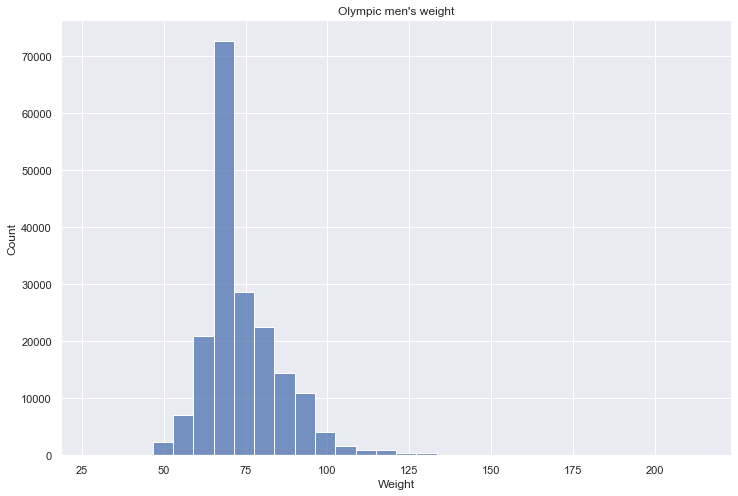

In [27]:
plt.figure(figsize = (12,8))
sns.histplot(data = athlete_info , x = athlete_info['Weight'].loc[athlete_info['Sex'] == 'M'],bins = 30)
plt.title('Olympic men\'s weight')

Text(0.5, 1.0, 'Age by Groups')

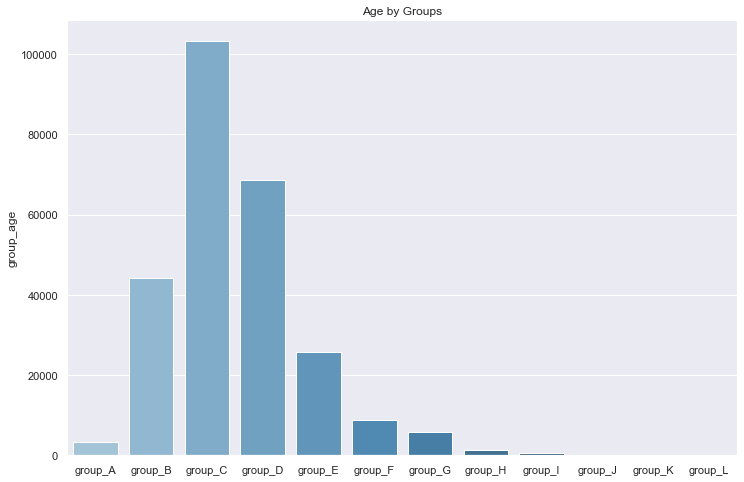

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(data = age_group , x = age_group.index , y = 'group_age',palette="Blues_d",dodge=False)
plt.title("Age by Groups")

Text(0.5, 1.0, 'Countries with most Number of athlete')

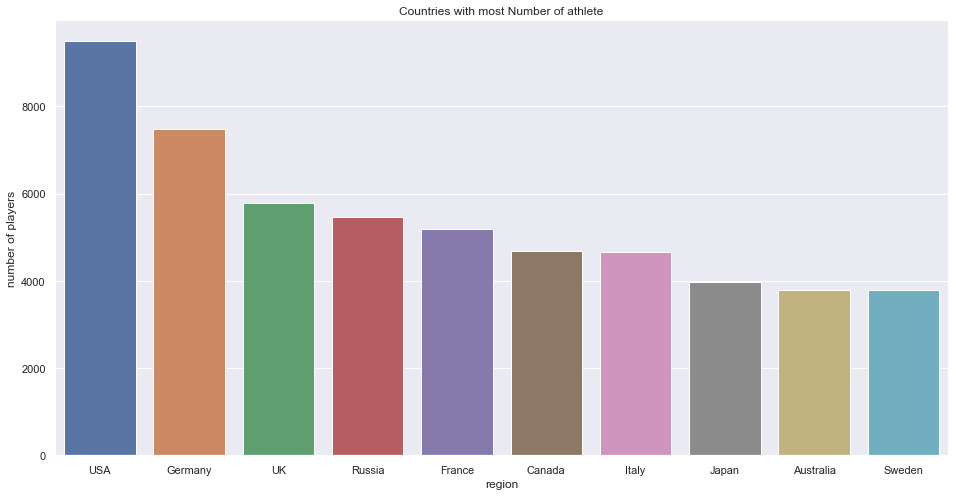

In [29]:
plt.figure(figsize=(16,8))
sns.barplot(data = countries_with_most_players , x = 'region' , y = 'number of players')
plt.title('Countries with most Number of athlete')

<AxesSubplot:xlabel='Medal', ylabel='Count'>

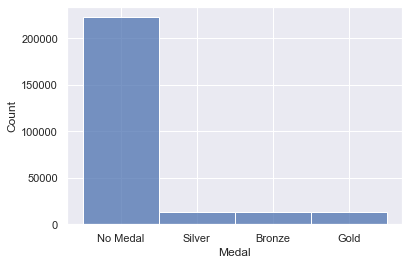

In [30]:
sns.histplot(data = athlete_events , x = 'Medal')

## Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?

#### Hypothesis week 1

Q1: - The age group 20-25 is the most represented?

**Confirmed**

Q2:- US is the most regular country along the years (measure: number of participants and medals)?

 + Partially confirmed. The USA is the country with the most participants and medals. However, it is necessary to check over time.


Q3: - Women in developed countries participate more and get better results (won more medals)
+ Need more work.

## What additional questions are you seeking to answer?

1:- Which country (NOC) have the most medals for each sport? Has there been a shift over the time? 

2:- Are athletes taller today than they were in the past? Is height an advantage in some sports? Is height just as much of an advantage for women as men?

In [51]:
athlete_events.loc[athlete_events['Sex'] == 'F','Weight'].describe()

count    74098.000000
mean        61.013091
std         10.140283
min         25.000000
25%         55.000000
50%         60.000000
75%         68.500000
max        167.000000
Name: Weight, dtype: float64